Import All Library

I can't upload datasets because my size over large if upload to github.

so this my datasets can dawnload in kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [63]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import  iplot
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

Exploratory Data Analysis

In [64]:
dt = pd.read_csv('./DATASETS/creditcard.csv')

In [65]:
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
pd.options.display.max_columns = None

In [67]:
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
dt.shape

(284807, 31)

In [69]:
dt.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [70]:
dt.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [71]:
dt.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [72]:
dt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [73]:
temp = dt["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Green"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [74]:
class_0 = dt.loc[dt['Class'] == 0]["Time"]
class_1 = dt.loc[dt['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

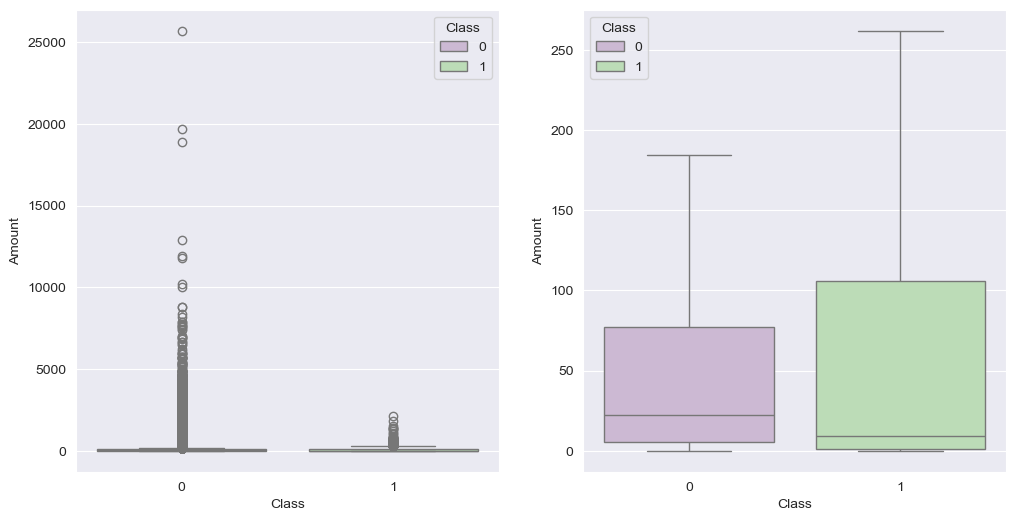

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dt, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dt, palette="PRGn",showfliers=False)
plt.show();

In [76]:
dt.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [77]:
dt.shape

(284807, 31)

In [78]:
dt = dt.drop(['Time'], axis =1)

In [79]:
dt.shape

(284807, 30)

In [80]:
X = dt.drop('Class', axis=1)
y = dt['Class']

In [81]:
X.shape

(284807, 29)

Clasification for Label Class 0 or 1

In [82]:
dt_normal = dt[dt['Class'] == 0]
dt_fraud = dt[dt['Class'] == 1]

In [83]:
dt_normal.shape

(284315, 30)

In [84]:
dt_fraud.shape

(492, 30)

Normalisasi Imbalanced Data

In [85]:
dt_normal = dt_normal.sample(n=473)

In [86]:
dt_normal.shape

(473, 30)

Make dataframe sample after Normalisasi

In [87]:
dt_sample = pd.concat([dt_normal, dt_fraud], ignore_index=True)

In [88]:
dt_sample.shape

(965, 30)

In [89]:
dt_sample['Class'].value_counts()

Class
1    492
0    473
Name: count, dtype: int64

In [90]:
X = dt_sample.drop('Class', axis=1)
y = dt_sample['Class']

In [91]:
X.shape

(965, 29)

In [92]:
y.shape

(965,)

Training Data 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

Modeling

In [95]:
modeling = {
    'Logistic Regresion': LogisticRegression(),
    'Decision Tree Classifire': DecisionTreeClassifier(),
}

for name, clf in modeling.items():
    print(f"------- {name} -------")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"accuracy {round(accuracy_score(y_test, y_pred) * 100, 2)}")
    print(f"precision {round(precision_score(y_test, y_pred) * 100, 2)}")
    print(f"recall {round(recall_score(y_test, y_pred) * 100, 2)}")
    print(f"F1 score {round(f1_score(y_test, y_pred) * 100, 2)}")

------- Logistic Regresion -------
accuracy 92.75
precision 97.85
recall 88.35
F1 score 92.86
------- Decision Tree Classifire -------
accuracy 91.19
precision 93.88
recall 89.32
F1 score 91.54


C:\Users\Rafli\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [96]:
temp = dt_sample["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Green"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

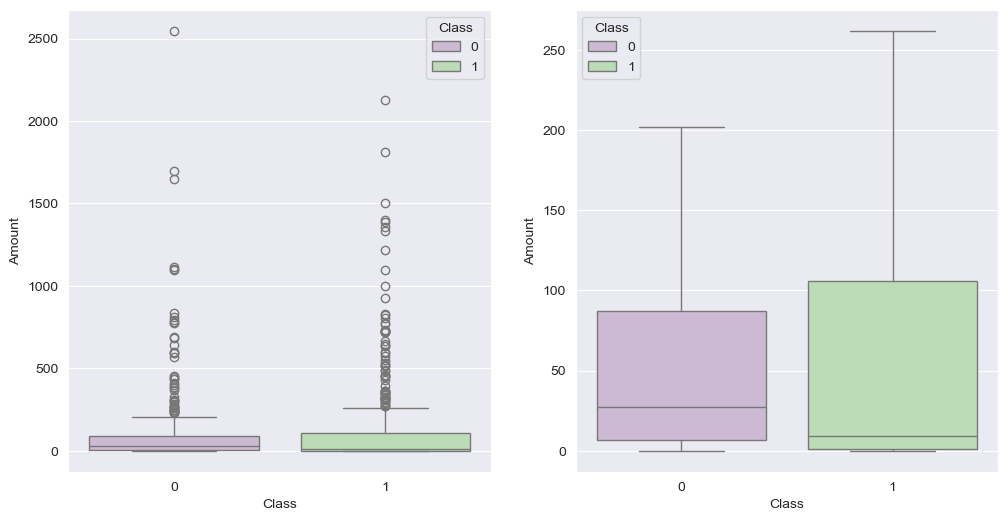

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dt_sample, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dt_sample, palette="PRGn",showfliers=False)
plt.show();

In [98]:
dt_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.528098,-1.215243,-1.044582,-0.082178,0.247343,1.867128,-0.725718,0.539660,0.796085,-0.003482,0.924519,0.992734,0.370734,0.155411,1.040859,0.102921,-0.343489,-0.509179,-0.946560,0.186622,0.377079,0.835370,0.043433,-0.878826,-0.550259,0.712189,-0.030826,-0.035430,199.50,0
1,2.106911,-0.055489,-1.378199,0.227106,0.288465,-0.685444,0.177045,-0.279667,0.540941,0.055904,-1.313578,0.387261,0.531492,0.168204,0.105965,0.042299,-0.527630,-0.751741,0.358687,-0.183986,-0.329417,-0.788008,0.248655,-0.766063,-0.200525,0.247097,-0.066382,-0.067455,1.98,0
2,2.127342,-0.985106,-2.642821,-1.226925,1.894141,3.532282,-0.918524,0.784548,-0.168647,0.686446,-0.577523,0.216885,-0.052374,0.172821,-0.267051,-2.344252,0.119985,0.876348,-0.724164,-0.584228,-0.202012,0.103763,0.072179,0.715778,0.312266,-0.034087,0.036369,-0.062140,11.50,0
3,-0.350214,0.948981,2.397142,4.554145,-0.170784,0.899240,-0.460957,0.454855,-1.024312,1.562301,-1.422292,-1.225788,-0.858847,-0.077833,1.013106,0.280624,0.112166,0.563928,0.915420,0.324472,0.082458,0.361202,0.098813,-0.070926,-0.950211,0.253753,0.488939,0.273428,13.65,0
4,1.011290,-0.639840,0.277260,0.651296,-1.072497,-1.042796,0.041717,-0.320749,-1.132992,0.741836,-0.304339,0.080963,0.402424,0.265452,0.748946,-1.535669,-0.054289,1.102138,-1.308966,-0.212864,-0.210765,-0.463320,-0.124757,0.692987,0.477346,-0.365182,0.009661,0.057693,170.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
961,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
962,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
963,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [99]:
X = dt_sample.drop('Class', axis = 1)
y = dt_sample['Class']

In [100]:
X.shape

(965, 29)

In [101]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [102]:
y_res.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [105]:
algoritm = {
    'Logistic Regresion': LogisticRegression(),
    'Decision Tree Classifire': DecisionTreeClassifier(),
}

for name, clf in algoritm.items():
    print(f"------- {name} -------")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"accuracy {round(accuracy_score(y_test, y_pred) * 100, 2)}")
    print(f"precision {round(precision_score(y_test, y_pred) * 100, 2)}")
    print(f"recall {round(recall_score(y_test, y_pred) * 100, 2)}")
    print(f"F1 score {round(f1_score(y_test, y_pred) * 100, 2)}")

------- Logistic Regresion -------
accuracy 94.92
precision 96.91
recall 93.07
F1 score 94.95
------- Decision Tree Classifire -------
accuracy 86.29
precision 93.02
recall 79.21
F1 score 85.56


C:\Users\Rafli\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [106]:
X_res

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.528098,-1.215243,-1.044582,-0.082178,0.247343,1.867128,-0.725718,0.539660,0.796085,-0.003482,0.924519,0.992734,0.370734,0.155411,1.040859,0.102921,-0.343489,-0.509179,-0.946560,0.186622,0.377079,0.835370,0.043433,-0.878826,-0.550259,0.712189,-0.030826,-0.035430,199.500000
1,2.106911,-0.055489,-1.378199,0.227106,0.288465,-0.685444,0.177045,-0.279667,0.540941,0.055904,-1.313578,0.387261,0.531492,0.168204,0.105965,0.042299,-0.527630,-0.751741,0.358687,-0.183986,-0.329417,-0.788008,0.248655,-0.766063,-0.200525,0.247097,-0.066382,-0.067455,1.980000
2,2.127342,-0.985106,-2.642821,-1.226925,1.894141,3.532282,-0.918524,0.784548,-0.168647,0.686446,-0.577523,0.216885,-0.052374,0.172821,-0.267051,-2.344252,0.119985,0.876348,-0.724164,-0.584228,-0.202012,0.103763,0.072179,0.715778,0.312266,-0.034087,0.036369,-0.062140,11.500000
3,-0.350214,0.948981,2.397142,4.554145,-0.170784,0.899240,-0.460957,0.454855,-1.024312,1.562301,-1.422292,-1.225788,-0.858847,-0.077833,1.013106,0.280624,0.112166,0.563928,0.915420,0.324472,0.082458,0.361202,0.098813,-0.070926,-0.950211,0.253753,0.488939,0.273428,13.650000
4,1.011290,-0.639840,0.277260,0.651296,-1.072497,-1.042796,0.041717,-0.320749,-1.132992,0.741836,-0.304339,0.080963,0.402424,0.265452,0.748946,-1.535669,-0.054289,1.102138,-1.308966,-0.212864,-0.210765,-0.463320,-0.124757,0.692987,0.477346,-0.365182,0.009661,0.057693,170.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.521441,1.375184,-1.027315,1.454679,0.444858,-1.293480,0.429260,-0.059838,-0.543397,-1.071399,0.123766,-0.134588,0.604355,-1.922965,1.707382,0.058062,2.113901,1.334724,1.041287,0.092279,0.183308,0.675731,-0.135786,-0.028510,-0.372383,-0.010816,0.166092,0.186864,1.000000
980,0.874483,0.011906,-1.056653,-0.309879,1.795378,3.693577,-0.910350,0.505320,0.212239,-0.284170,-0.479219,0.319090,-0.151493,0.244659,0.144636,0.196913,-0.443004,-0.171356,0.577486,0.124561,-0.527045,-0.818710,0.068095,1.014000,0.422022,0.138655,-0.077489,0.013507,24.286436
981,-1.051033,1.589334,-0.275728,0.306659,0.110445,-0.235448,-0.659399,-3.344598,-0.097190,0.072123,-1.001536,0.226818,-0.252878,0.651860,0.425515,-0.710081,0.592438,-0.463720,1.452277,-0.705641,3.169312,-1.335995,0.725529,-0.097393,-1.285575,0.312783,0.305123,0.250312,2.312002
982,1.178440,-1.331471,-1.037323,-0.092426,-0.795303,-0.363122,-0.053108,-0.173429,-0.085816,0.367531,-0.942365,0.192979,0.636188,-0.470876,-1.300820,-0.043827,0.660020,-1.292843,0.867196,0.497827,0.531416,1.342393,-0.254243,-0.126513,0.359092,0.192127,-0.002519,-0.009887,249.978831


In [107]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [108]:
joblib.dump(dtc, "model_balance.pkl")

['model_balance.pkl']

In [109]:
model = joblib.load('model_balance.pkl')

In [110]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\Rafli\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [111]:
pred[0]

0

In [112]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation
